In [1]:
import pickle
import mmcv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#
# Read detection features
#

with open("../debug_var/detector_feat.pkl", "rb") as f:
    detector_feat = pickle.load(f)

detector_feat[0].shape

torch.Size([10, 256, 128, 128])

In [4]:
detector_feat[1].shape

torch.Size([10, 256, 64, 64])

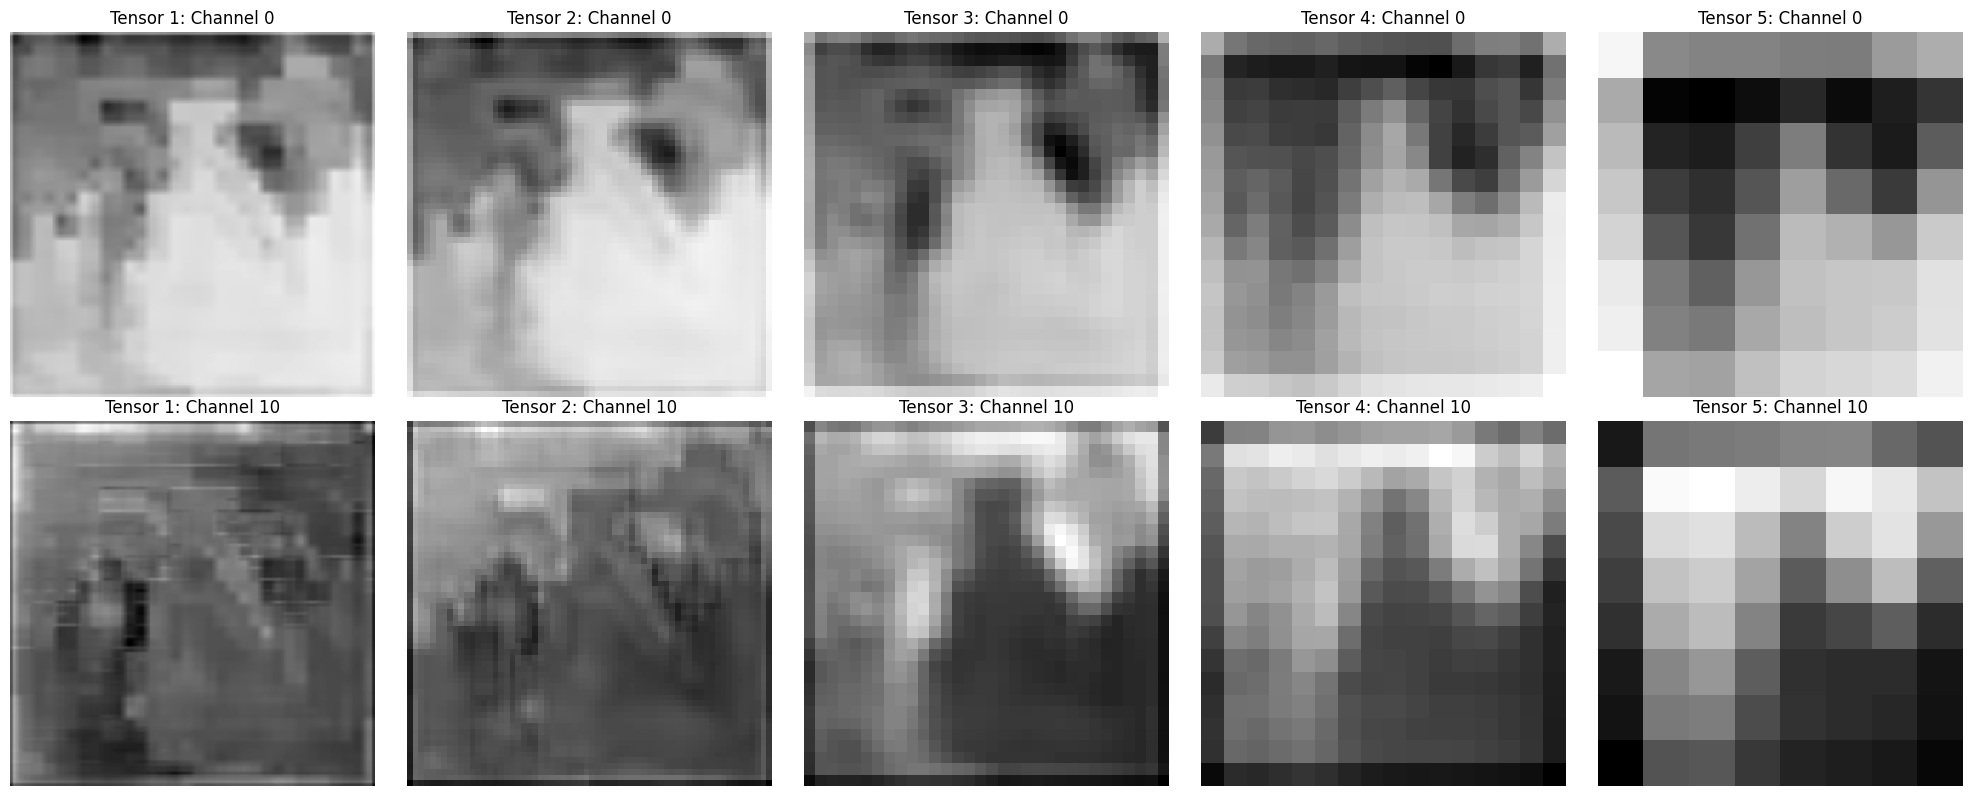

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, tensor in enumerate(detector_feat):
    # Get the first image's channel 0
    img_channel_0 = tensor[0, 0]  # Shape: [128, 128]
    # Get the first image's channel 10
    img_channel_10 = tensor[0, 10]  # Shape: [128, 128]

    # Plot channel 0 in the first row
    ax = axes[0, i]
    ax.imshow(img_channel_0.cpu().numpy(), cmap="gray")
    ax.axis("off")
    ax.set_title(f"Tensor {i+1}: Channel 0")

    # Plot channel 10 in the second row
    ax = axes[1, i]
    ax.imshow(img_channel_10.cpu().numpy(), cmap="gray")
    ax.axis("off")
    ax.set_title(f"Tensor {i+1}: Channel 10")

plt.tight_layout()
plt.show()

In [47]:
#
# Read region_proposal
#

with open("../debug_var/proposal_list.pkl", "rb") as f:
    proposal_list = pickle.load(f)


img = mmcv.imread("../data/lidc/Images/Patient0000/Image_00.png")

gt_bbox2d_p0 = np.array(
    [[369, 567, 54, 70], [371, 569, 46, 72], [371, 569, 52, 66], [363, 569, 60, 66]]
)

gt_bbox2d_p0[:, 2] = gt_bbox2d_p0[:, 0] + gt_bbox2d_p0[:, 2]
gt_bbox2d_p0[:, 3] = gt_bbox2d_p0[:, 1] + gt_bbox2d_p0[:, 3]


img_gtbbox = mmcv.imshow_bboxes(img, gt_bbox2d_p0, colors="blue", show=False)

Text(0.5, 1.0, 'Region proposals for Patient0000_cam00\ntensor shape: (1000, 5)')

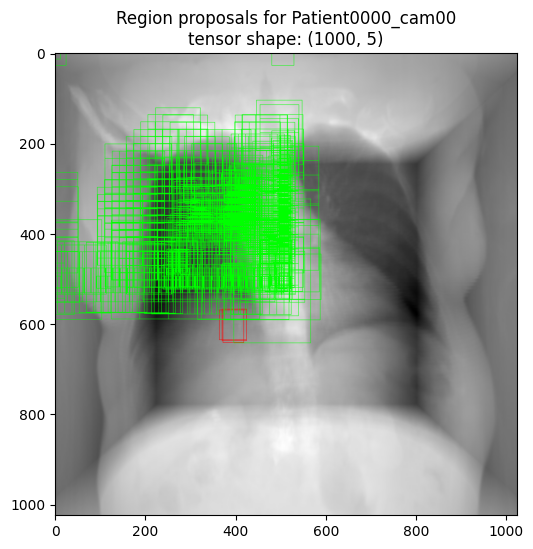

In [26]:
prop = proposal_list[0].cpu().numpy()

img_with_proposal = mmcv.imshow_bboxes(
    img=img_gtbbox,
    bboxes=prop[:, :4],
    # labels=labels,
    colors="green",
    thickness=1,
    show=False,
)

plt.figure(figsize=(8, 6))
plt.imshow(img_with_proposal)
plt.title(f"Region proposals for Patient0000_cam00\ntensor shape: {prop.shape}")
# plt.savefig("../debug_var/figures/img_proposals.jpg")

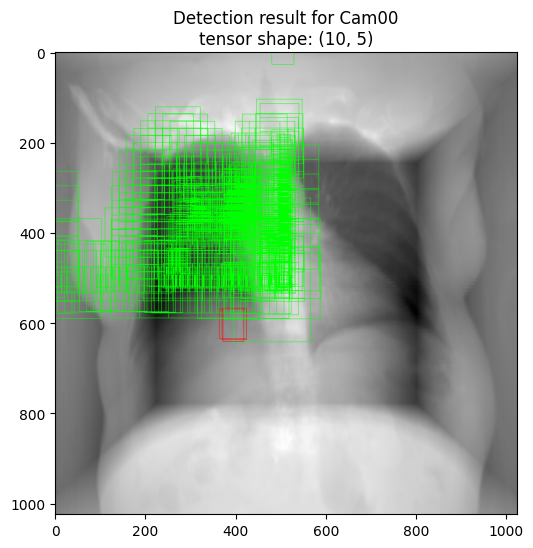

In [9]:
#
# Read det_result
#

with open("../debug_var/det_results.pkl", "rb") as f:
    det_results = pickle.load(f)

det_cam00 = det_results[1][0]  # (14, 5)

img_with_det_result = mmcv.imshow_bboxes(
    img=img_gtbbox,
    bboxes=det_cam00[:, :4],
    # labels=labels,
    colors="green",
    thickness=1,
    show=False,
)

plt.figure(figsize=(8, 6))
plt.imshow(img_with_det_result)
plt.title(f"Detection result for Cam00\ntensor shape: {det_cam00.shape}")
plt.show()
# plt.savefig("../debug_var/figures/img_proposals.jpg")

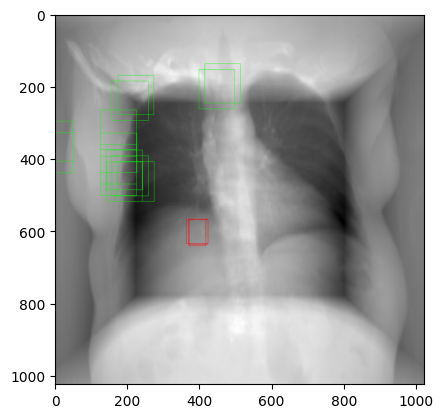

In [48]:
#
# Read det_bboxes and det_labels
#

with open("../debug_var/det_bboxes.pkl", "rb") as f:
    det_bboxes = pickle.load(f)

with open("../debug_var/det_labels.pkl", "rb") as f:
    det_labels = pickle.load(f)

len(det_bboxes)
det_bboxes[1].shape

len(det_labels)
det_labels[1]

img_with_det_bbox = mmcv.imshow_bboxes(
    img=img_gtbbox,
    bboxes=det_bboxes[0][:, :4].cpu().numpy(),
    # labels=labels,
    colors="green",
    thickness=1,
    show=False,
)

plt.imshow(img_with_det_bbox)

In [49]:
#
# Read 2D object detections result
#

with open("../debug_var/detections.pkl", "rb") as f:
    detections = pickle.load(f)

type(detections)
len(detections)
detections[0].shape

labels = np.array([0, 0, 0, 0, 0, 0])

img_with_det_bbox = mmcv.imshow_det_bboxes(
    img=img_gtbbox,
    bboxes=detections[0][:, :5].cpu().numpy(),
    labels=detections[0][:, 5].cpu().numpy(),
    score_thr=0.1,
    text_color="red",
    # colors="green",
    thickness=1,
    show=True,
)

# plt.imshow(img_with_det_bbox)

In [ ]:
#
# Read detection after process 2d
#

with open("../debug_var/detections_after_process2d.pkl", "rb") as f:
    det_after_process2d = pickle.load(f)


det00 = det_after_process2d[0].cpu().numpy()

img_with_det_bbox = mmcv.imshow_bboxes(
    img=img_gtbbox,
    bboxes=det00[:, :4],
    # labels=labels,
    colors="green",
    thickness=1,
    show=False,
)

# plt.imshow(img_with_det_bbox)

In [ ]:
#
# Read bbox feature
#

with open("../debug_var/bbox_feats.pkl", "rb") as f:
    bbox_feat = pickle.load(f)


bbox_feat.shape

torch.Size([114, 256, 7, 7])

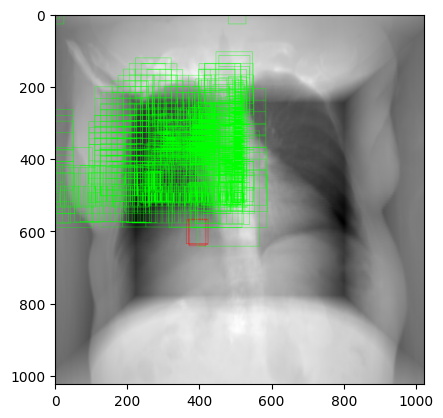

In [22]:
#
# Read bbox_result
#

with open("../debug_var/bbox_results.pkl", "rb") as f:
    bbox_results = pickle.load(f)

type(bbox_results)
bbox_results["rois"].shape

rois = bbox_results["rois"][:, 1:].cpu().numpy()

img_with_rois = mmcv.imshow_bboxes(
    img=img_gtbbox,
    bboxes=rois,
    # labels=labels,
    colors="green",
    thickness=1,
    show=False,
)

plt.imshow(img_with_rois)

In [ ]:
bbox_results["rois"].shape

rois = bbox_results["rois"][:, 1:].cpu().numpy()

img_with_rois = mmcv.imshow_bboxes(
    img=img_gtbbox,
    bboxes=rois,
    # labels=labels,
    colors="green",
    thickness=1,
    show=True,
)